In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.simplefilter(action="ignore")

In [3]:
data=pd.read_csv("Flipkart_mobile_brands_scraped_data.csv")
data

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN


# MAKE COPY OF THE DATA

In [4]:
dataset=data.copy()
dataset.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


# Now we see unique features and null values in each and every features

In [5]:
dataset.Brand.unique()

array(['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'LG', 'ASUS', 'realme',
       'GIONEE', 'Nokia', 'Apple', 'SAMSUNG', 'Lenovo', 'Motorola',
       'POCO', 'vivo', 'Xiaomi'], dtype=object)

In [6]:
dataset["Model"].unique()

array(['A53', 'A12', 'A53s 5G', 'A33', 'A31', 'A74 5G', 'A11K', 'F17 Pro',
       'A54', 'Reno6 5G', 'F17', 'A16', 'Reno5 Pro 5G', 'A15',
       'A74 5G BLACK', 'Reno6 Pro 5G', 'Reno2 F', 'Reno3 Pro', 'A15s',
       'A15S', 'F19 Pro', 'F19 Pro+ 5G', 'F19', 'A7', 'F5', 'A5s', 'Reno',
       'Reno2 Z', 'F15', 'K1', 'A9 2020', 'Find X',
       'Reno4 Pro Special Edition', 'F11', 'A5', 'Reno4 Pro', 'A5 2020',
       'F3 Deepika Padukone Limited Edition', 'F1 Plus',
       'A83 2018 Edition', 'F3', 'A3s', 'A83', 'K3', 'F9', 'A52',
       'A71 New Edition', 'Neo 7 4G', 'A71', 'A57', 'A1K', 'A37f',
       'F9 Pro', 'F19s', 'A71k', 'A9', 'F3 Plus',
       'Rohit Sharma Limited Edition', 'F17 PRO',
       'Hardik Pandya Limited Editon',
       'Ravichandran Ashwin Limited Edition', 'F11 Pro', 'R1 R829',
       'F5 Youth', 'F7', 'Neo 5', 'F1', 'Reno2', 'R17',
       'F11 Pro Marvel’s Avengers Limited Edition', 'Reno 10x Zoom',
       'F1S', 'N5111', 'U11+ ', 'Wildfire X ', '3', '4a ', '3a XL ',


In [7]:
len(dataset.Model.unique())

774

In [8]:
len(dataset.Color.unique())

532

In [9]:
dataset.isnull().sum()

Brand                0
Model                2
Color              142
Memory              42
Storage             79
Rating               0
Selling Price        3
Original Price    1678
dtype: int64

# Missing Value Handling

In [10]:
dataset["Selling Price"].replace(np.nan,dataset["Selling Price"].mean(),inplace=True) 

In [11]:
dataset.isnull().any()

Brand             False
Model              True
Color              True
Memory             True
Storage            True
Rating            False
Selling Price     False
Original Price     True
dtype: bool

In [12]:
dataset.dropna(subset=["Memory", "Storage", "Model"], inplace=True)

In [13]:
dataset.isnull().sum()

Brand                0
Model                0
Color              104
Memory               0
Storage              0
Rating               0
Selling Price        0
Original Price    1614
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Color"]=le.fit_transform(dataset["Color"])
dataset.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,316,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,306,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,316,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,306,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,163,4 GB,64 GB,4.5,11990.0,15990.0


In [15]:
from sklearn.impute import SimpleImputer 
si=SimpleImputer(missing_values=np.nan, strategy="mean")
dataset["Color"]=si.fit_transform(dataset.Color.values.reshape(-1,1))
dataset.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,316.0,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,306.0,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,316.0,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,306.0,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,163.0,4 GB,64 GB,4.5,11990.0,15990.0


In [16]:
dataset.isnull().any()

Brand             False
Model             False
Color             False
Memory            False
Storage           False
Rating            False
Selling Price     False
Original Price     True
dtype: bool

In [17]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy="mean")
dataset["Original Price"]=si.fit_transform(dataset["Original Price"].values.reshape(-1,1))

In [18]:
dataset.isnull().any()

Brand             False
Model             False
Color             False
Memory            False
Storage           False
Rating            False
Selling Price     False
Original Price    False
dtype: bool

# ANALYSIS THE DATASET

# BRANDS AND THEIR ORIGINAL AND SELLING PRICE ANALYSIS

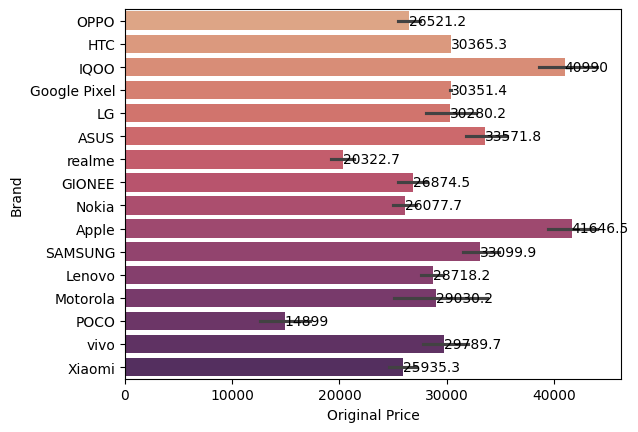

In [19]:
bar_plot=sns.barplot(data=dataset, x="Original Price", y="Brand", palette="flare")
for bar in bar_plot.containers:
    bar_plot.bar_label(bar)  
plt.show()

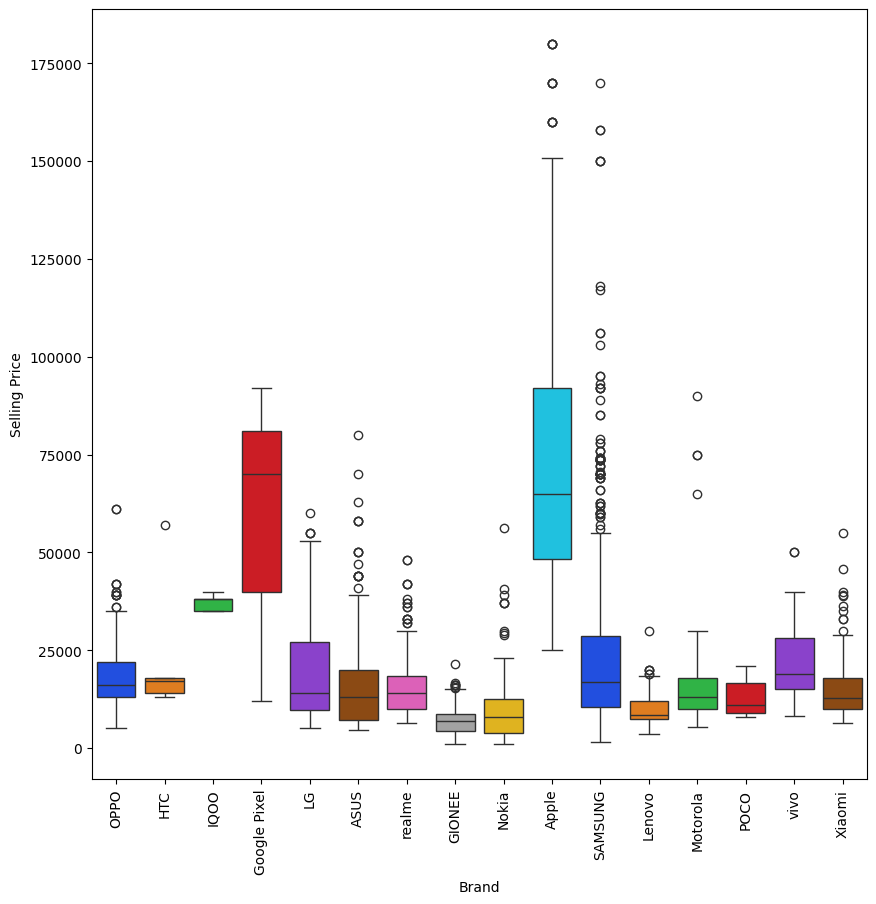

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=dataset, x="Brand", y="Selling Price", palette="bright")
plt.xticks(rotation=90)
plt.show()

# ANALYSE MOST COSTLY BRANDS

In [21]:
most_costly_brand = dataset.groupby(["Brand"],as_index=False)["Selling Price"].sum().sort_values(by="Selling Price",ascending=False)

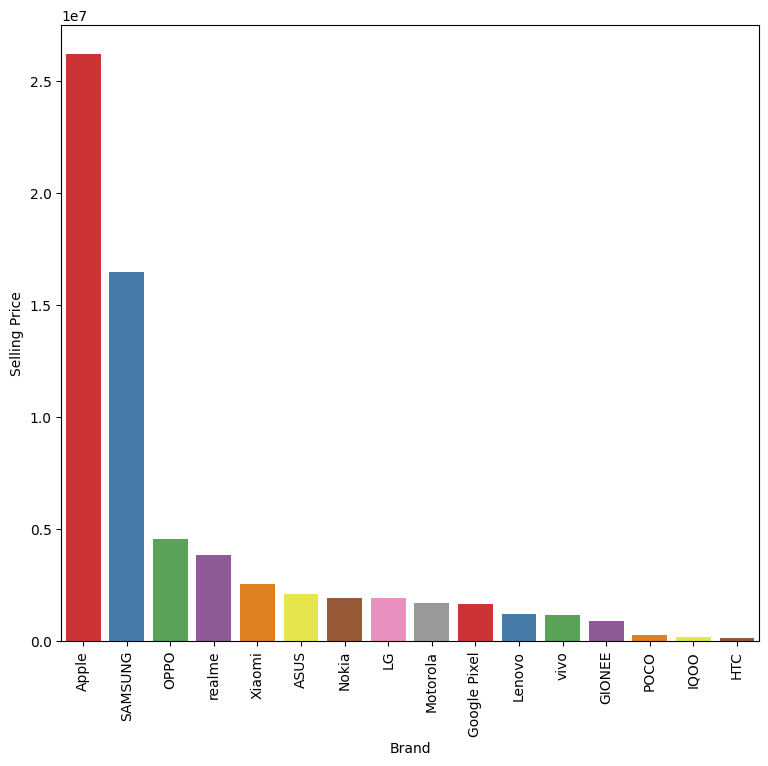

In [22]:
plt.figure(figsize=(9,8))
sns.barplot(data=most_costly_brand, x="Brand", y="Selling Price", palette="Set1")
plt.xticks(rotation=90)
plt.show()

# BRANDS AND THEIR RATING

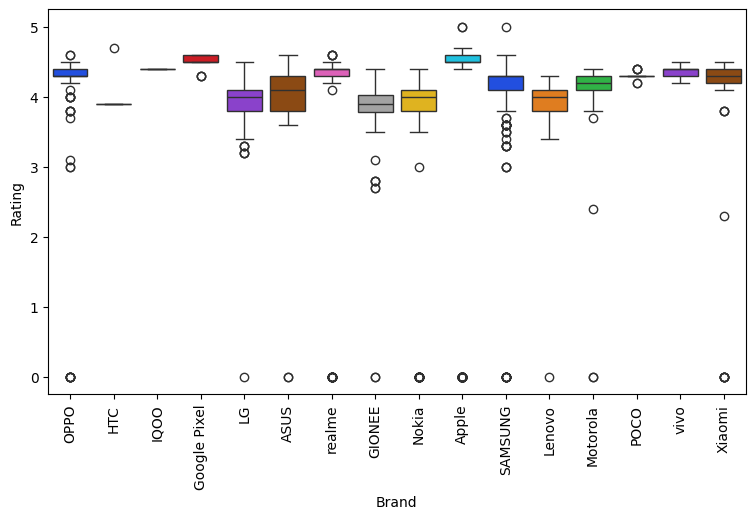

In [23]:
plt.figure(figsize=(9,5))
sns.boxplot(data=dataset, x="Brand", y="Rating", palette="bright")
plt.xticks(rotation=90)
plt.show()

# Brands and Their Offered Memory 

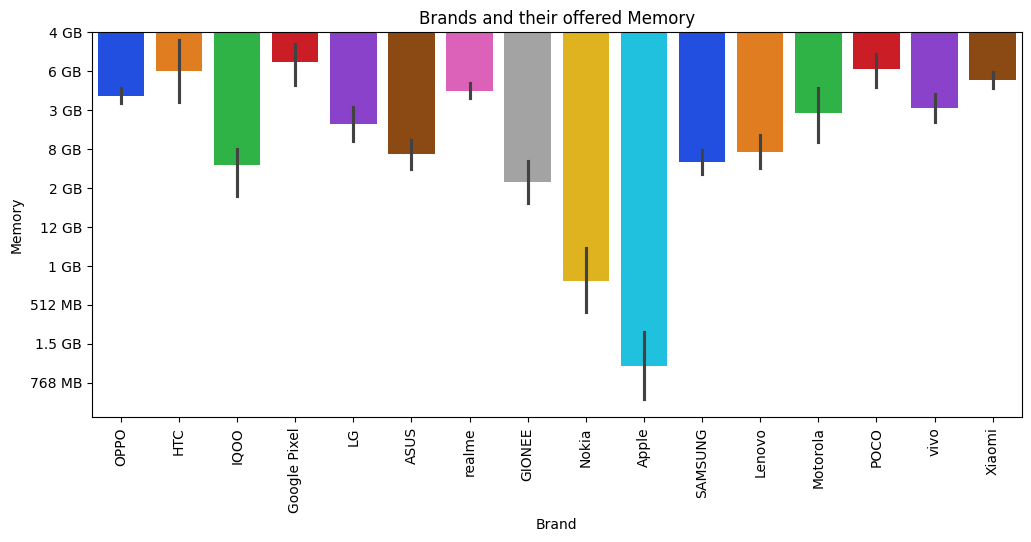

In [24]:
plt.figure(figsize=(12,5))
bar_plot=sns.barplot(data=dataset, x="Brand", y="Memory", palette="bright")
plt.xticks(rotation=90)
plt.title("Brands and their offered Memory")
plt.show()

# WE PLOT THE TOP 15 COLOR OFFERED BY THE BRANDS

ValueError: Invalid RGBA argument: 'l'

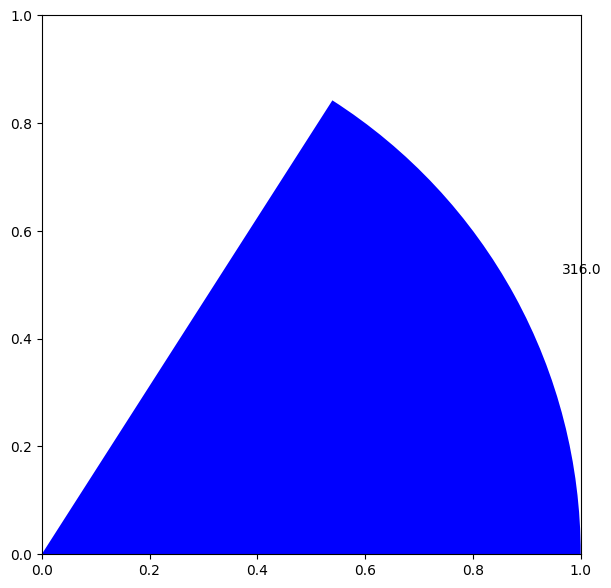

In [81]:
brand_color_count=dataset['Color'].head(10)
fig, ax=plt.subplots(figsize=(7,7))
ax.pie(brand_color_count, labels=brand_color_count, colors="blue")
plt.show()

# Check which Memory Size Highly Offered By the Brands

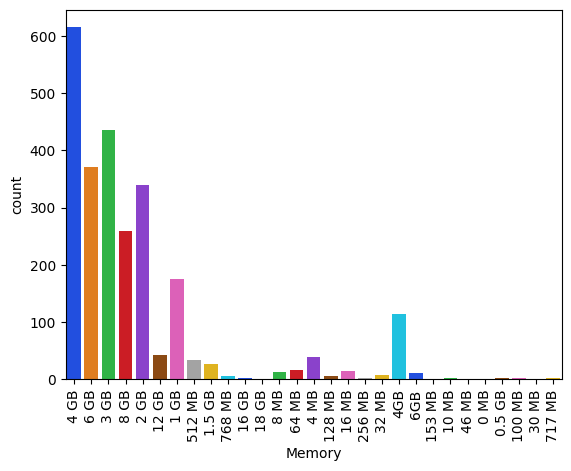

In [26]:
sns.countplot(data=dataset, x="Memory", palette="bright")
plt.xticks(rotation=90)
plt.show()

# Check which Storage Size Highly Offered By the Brands

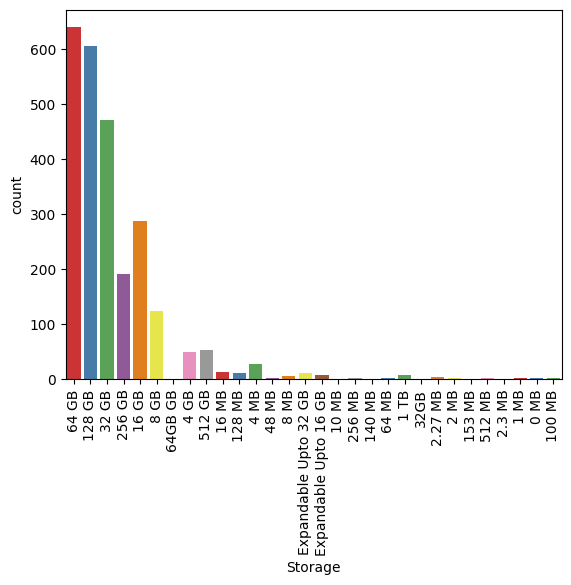

In [27]:
sns.countplot(data=dataset, x="Storage", palette="Set1")
plt.xticks(rotation=90)
plt.show()

# Rating based on Selling Price

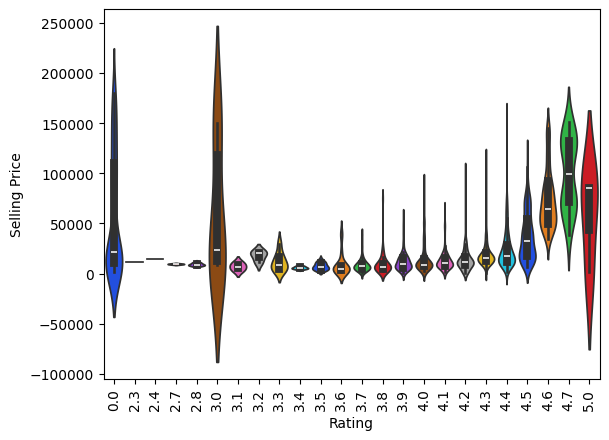

In [65]:
sns.violinplot(data=dataset, x="Rating", y="Selling Price", palette="bright")
plt.xticks(rotation=90)
plt.show()

# Top 10 Mobile Brands Based On Rating

In [29]:
top_10=dataset.nlargest(10, "Rating")
top_10

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
1253,Apple,iPhone 7 Plus,410.0,3 GB,256 GB,5.0,85400.0,30365.308934
1349,Apple,iPhone 7 Plus,410.0,3 GB,256 GB,5.0,85400.0,30365.308934
2022,SAMSUNG,SM-B310EZDDINS,529.0,100 MB,100 MB,5.0,1949.0,30365.308934
244,HTC,U11+,6.0,6 GB,128 GB,4.7,56990.0,30365.308934
1184,Apple,iPhone 11 Pro Max,300.0,4GB,64 GB,4.7,117100.0,30365.308934
1193,Apple,iPhone 11 Pro Max,213.0,4GB,64 GB,4.7,117100.0,30365.308934
1204,Apple,iPhone 11 Pro Max,451.0,4GB,64 GB,4.7,117100.0,30365.308934
1216,Apple,iPhone XS,213.0,4 GB,512 GB,4.7,134900.0,30365.308934
1230,Apple,iPhone XS,451.0,4 GB,512 GB,4.7,134900.0,30365.308934
1243,Apple,iPhone 11 Pro Max,213.0,4GB,256 GB,4.7,131900.0,30365.308934


# Least 10 Brands Based On Rating

In [31]:
least_10=dataset.nsmallest(10, "Rating")
least_10

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
37,OPPO,A16,357.0,4 GB,64 GB,0.0,13850.00000,30365.308934
41,OPPO,A16,74.0,4 GB,64 GB,0.0,13990.00000,15990.000000
128,OPPO,A16,123.0,4 GB,64 GB,0.0,26461.36233,30365.308934
145,OPPO,F19s,212.0,6 GB,128 GB,0.0,19990.00000,22990.000000
146,OPPO,F19s,211.0,6 GB,128 GB,0.0,19990.00000,22990.000000
156,OPPO,A74 5G,184.0,4 GB,128 GB,0.0,18490.00000,30365.308934
224,OPPO,F11 Pro Marvel’s Avengers Limited Edition,449.0,6 GB,128 GB,0.0,27990.00000,31990.000000
349,LG,G8s ThinQ,34.0,6 GB,128 GB,0.0,29999.00000,30365.308934
466,ASUS,ROG Phone 5 Pro,34.0,16 GB,512 GB,0.0,69999.00000,75999.000000
477,ASUS,ROG Phone 5 Ultimate,519.0,18 GB,512 GB,0.0,79999.00000,85999.000000


# Average Selling Price of Each Brand

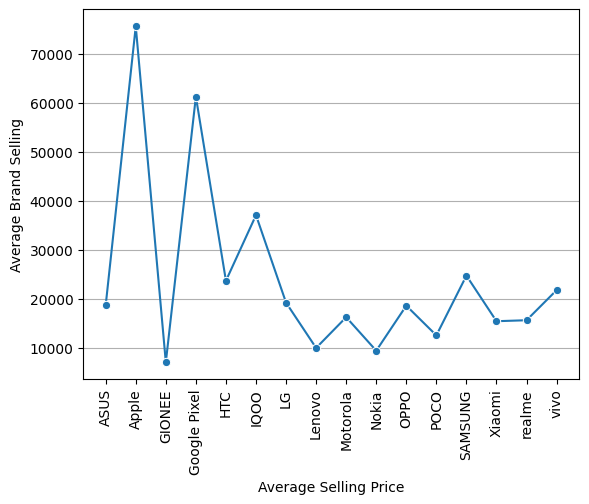

In [46]:
avg_sel_brand=dataset.groupby(["Brand"], as_index=False) ["Selling Price"].mean()
sns.lineplot(data=avg_sel_brand, x="Brand", y="Selling Price", marker="o")
plt.xlabel("Average Selling Price")
plt.xticks(rotation=90)
plt.ylabel("Average Brand Selling")
plt.grid(axis="y", linestyle="-")
plt.show()

# Most Costly Selling Model in Each Brand

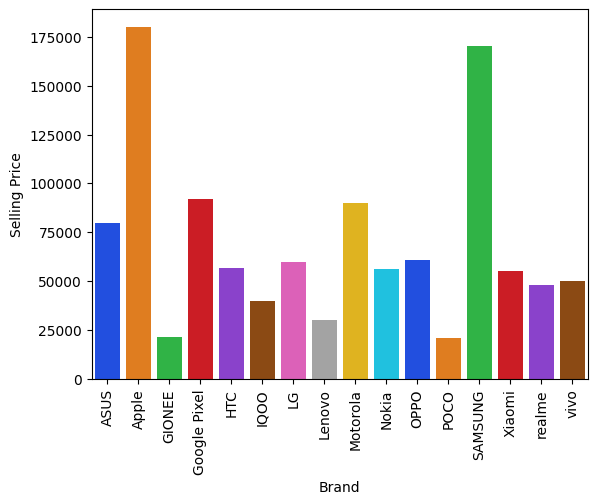

In [58]:
costly_selling=dataset.loc[dataset.groupby("Brand")["Selling Price"].idxmax()]
sns.barplot(data=costly_selling, x="Brand", y="Selling Price", palette="bright")
plt.xticks(rotation=90)
plt.show()

# Now we see the correlation between integer feature

In [66]:
correlation_matrix=dataset.corr(numeric_only=True)
correlation_matrix

,Color,Rating,Selling Price,Original Price
Color,1.000000,-0.056145,0.082499,0.036474
Rating,-0.056145,1.000000,-0.127714,0.076031
Selling Price,0.082499,-0.127714,1.000000,0.450023
Original Price,0.036474,0.076031,0.450023,1.000000


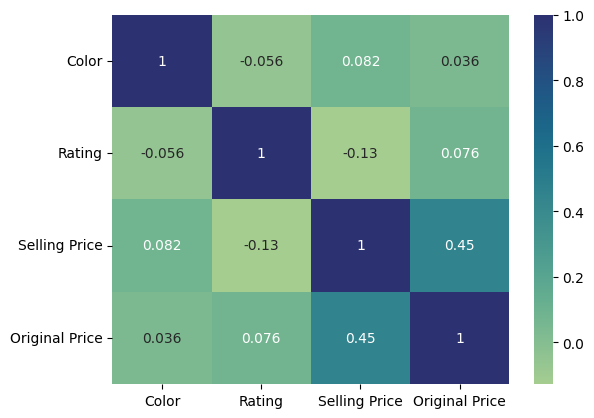

In [73]:
sns.heatmap(correlation_matrix, annot=True, yticklabels=True, xticklabels=True, cmap="crest")
plt.yticks(rotation=360)
plt.show()

# Conclusion 

1- Apple brand is highly rated and highly price brand.
2- Followed by apple Samsung is the secound highly rated brand and costly brand
3- Oppo, Asus, Realme, Motorola are the midrange brands.
4- Vivo and LG are the most buying brands in midrange.
5- 4GB Memory Size Offered By Many Brands.
6- Based on Rating Oppo is lowest ratwd